For the starting I am going to import some libraries for the processing of the dataset

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install ucimlrepo

Since the dataset was a zip file downloaded from UCI repository. I extracted it to a file and upload in the google drive. But it was a different file so I am just using the import python from the site. directly loading to the google colab.

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
data_chronic_kidney = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X_kidney = data_chronic_kidney.data.features
y_kidney = data_chronic_kidney.data.targets

# metadata
print(data_chronic_kidney.metadata)

# variable information
print(data_chronic_kidney.variables)

#print X_kidney
print(X_kidney)

#print the target variables
print(y_kidney)



{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [4]:
#print X_kidney
print(X_kidney)

      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

Checking for missing values

In [5]:
X_miss_kid = X_kidney.isnull().sum()
print(X_miss_kid)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


It have missing values

In [6]:
Y_miss_kid = y_kidney.isnull().sum()
print(Y_miss_kid)

class    0
dtype: int64


Since the target varible doesnt have any null values we dont require to drop nan

Next i am going to find the summary statistics of the data

In [7]:
#print the summary statistics of the data
X_kidney.describe()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [8]:
X_kidney.shape

(400, 24)

In [9]:
X_kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [10]:
X_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

Since this is a mixed dtypes we have to change the object to numeric as these contains normal or abnormal.

In [11]:
X_kidney.duplicated().sum()

0

There is no duplicates

In [12]:
y_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [13]:
print(y_kidney['class'])

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: class, Length: 400, dtype: object


In [14]:
# Check for unique values in the target variable
print(y_kidney['class'].unique())


['ckd' 'ckd\t' 'notckd']


In [15]:
# Replace 'ckd\t' with 'ckd'
y_kidney['class'] = y_kidney['class'].replace('ckd\t', 'ckd')

# Verify the replacement
print(y_kidney['class'].unique())


['ckd' 'notckd']


<ipython-input-15-a15ab6d55ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_kidney['class'] = y_kidney['class'].replace('ckd\t', 'ckd')


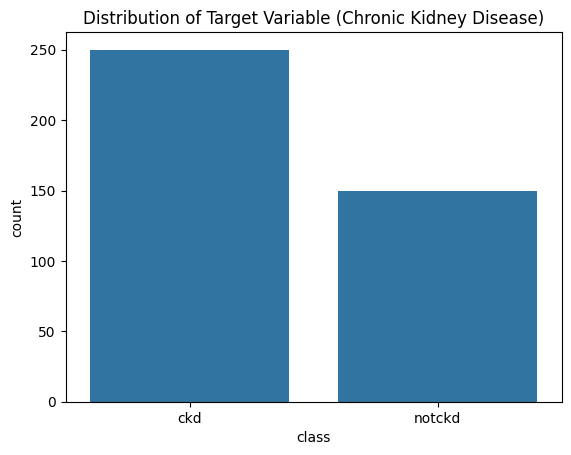

In [16]:
# Plot distribution of target variable (class column in y_kidney)
sns.countplot(x=y_kidney['class'])
plt.title("Distribution of Target Variable (Chronic Kidney Disease)")
plt.show()


class
ckd       250
notckd    150
Name: count, dtype: int64


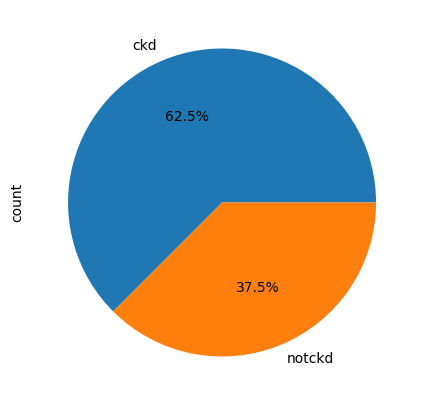

In [17]:
# Plot pie chart
plot_df = y_kidney['class'].value_counts()
print(plot_df)
plot_df.plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5), title='')
plt.show()


In [18]:
# Separate numerical and categorical features
numerical_features = X_kidney.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_kidney.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
Categorical Features: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


<Figure size 1500x1000 with 0 Axes>

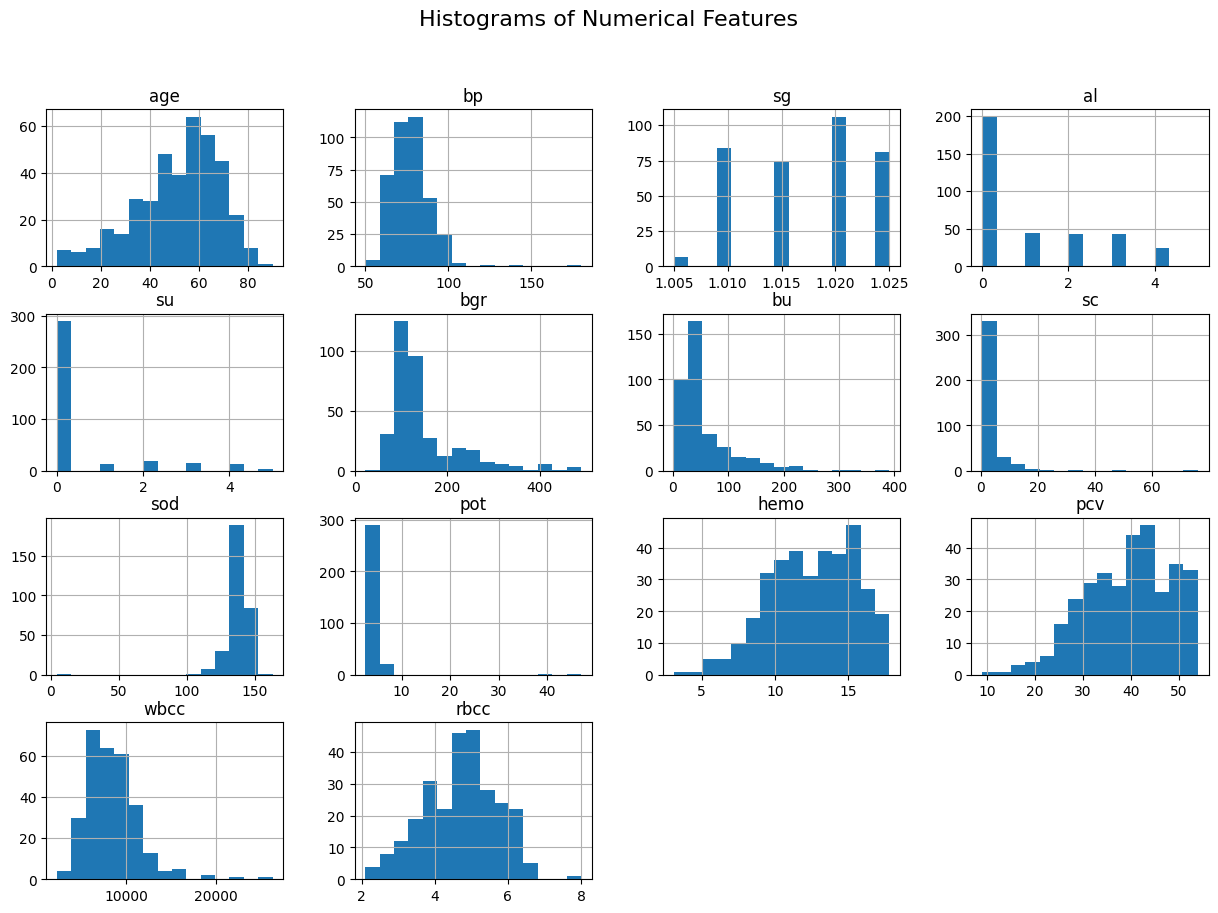

In [19]:
plt.figure(figsize=(15, 10))
X_kidney[numerical_features].hist(bins=15, layout=(4, 4), figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

<ipython-input-20-2e58a9b6b11d>:8: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


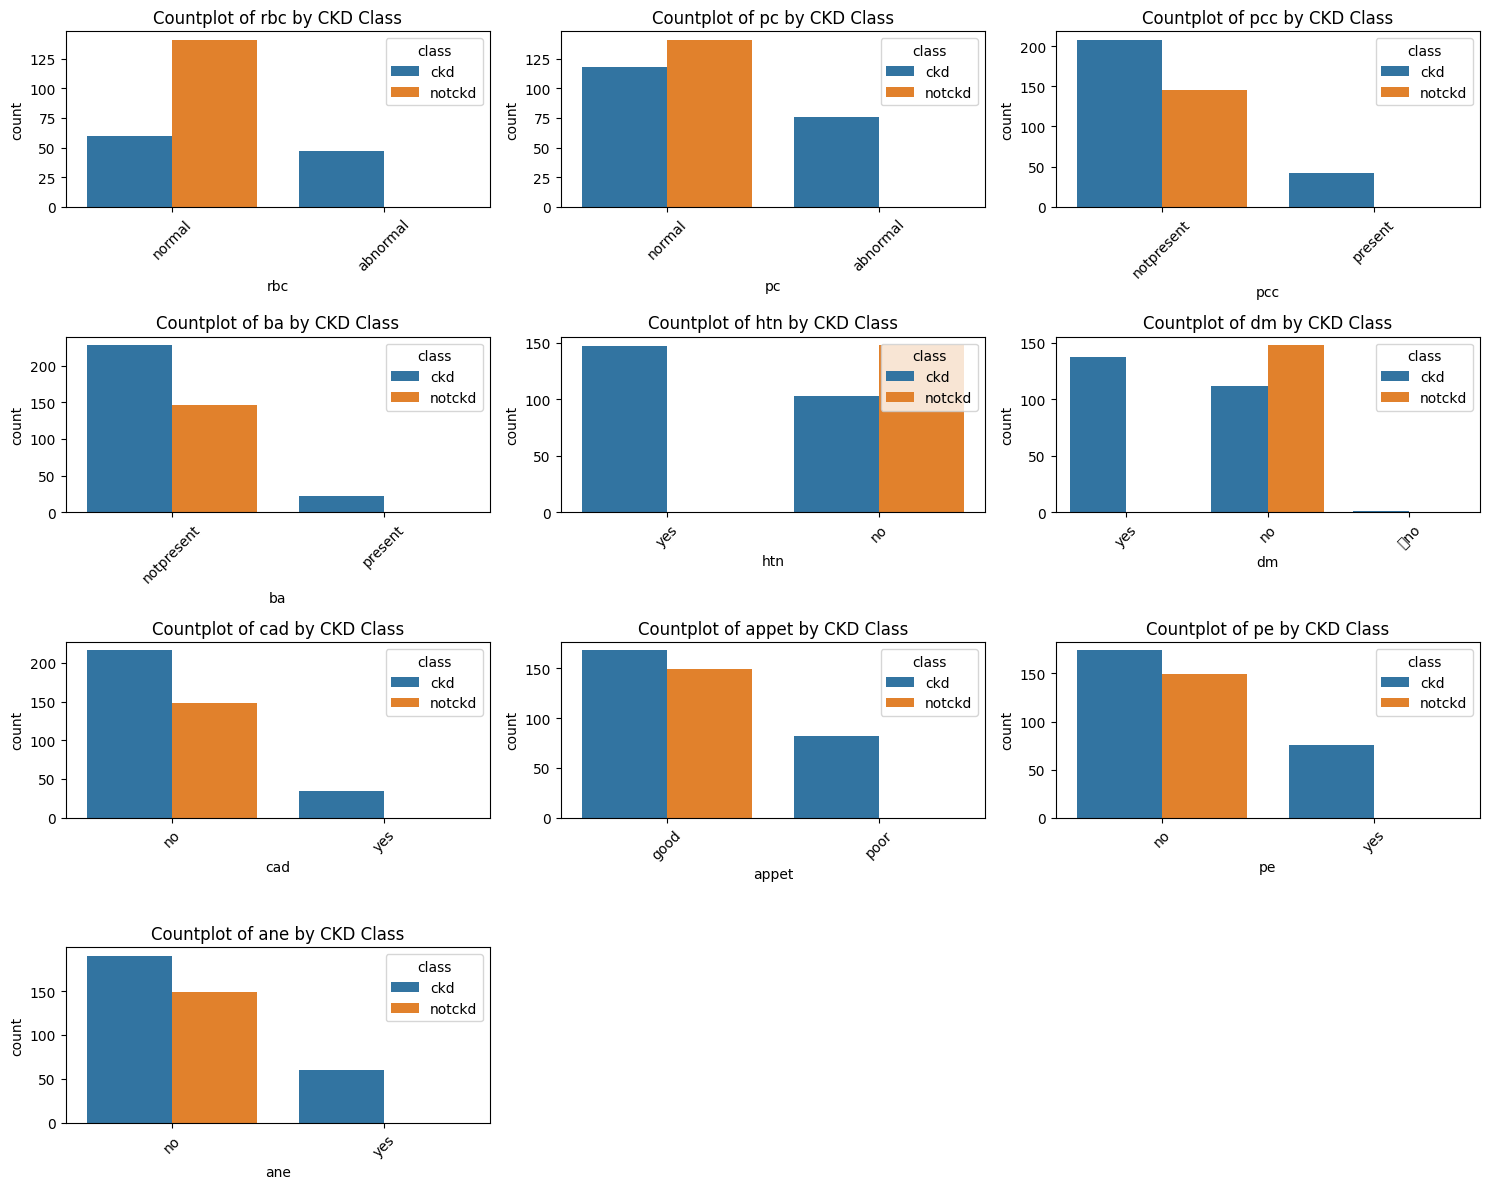

In [20]:
# Plot count plots for categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=X_kidney[feature], hue=y_kidney['class'])
    plt.title(f"Countplot of {feature} by CKD Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
# Check the unique values in the 'dm' column (diabetics)
dm_values = X_kidney['dm'].unique()
print("Unique values in 'dm' column:", dm_values)


Unique values in 'dm' column: ['yes' 'no' '\tno' nan]


In [22]:
# Replace '\tno' with 'no' in the 'dm' column
X_kidney['dm'] = X_kidney['dm'].replace('\tno', 'no')



<ipython-input-22-8dd552bde85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_kidney['dm'] = X_kidney['dm'].replace('\tno', 'no')


In [24]:
print(X_kidney['dm'].unique())

['yes' 'no' nan]


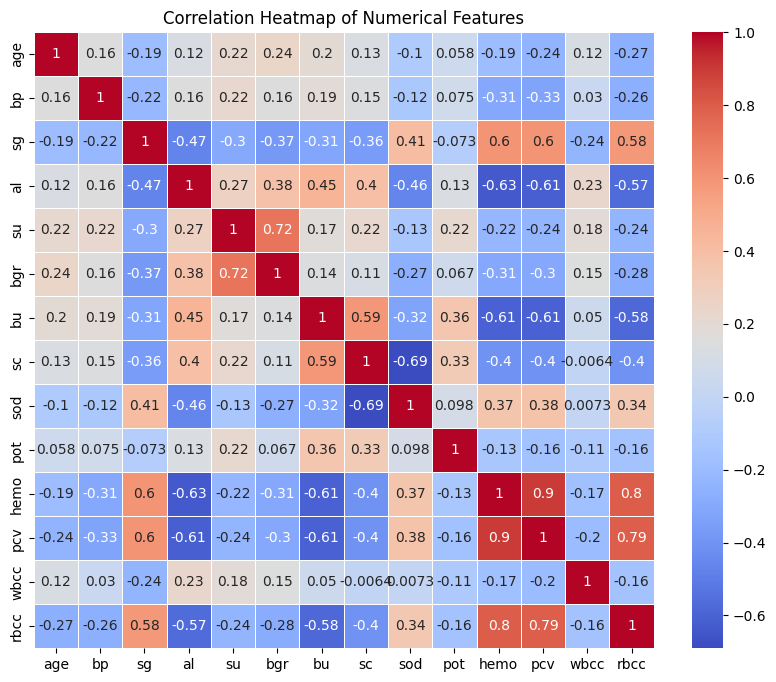

In [25]:
# Correlation matrix
corr_matrix = X_kidney[numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


su (sugar) and al (albumin) → Correlation: 0.72 (positive correlation)
bu (blood urea) and sc (serum creatinine) → Correlation: 0.59 (moderate but noteworthy)
hemo (hemoglobin) and pcv (packed cell volume) → Correlation: 0.91 (positive correlation)
hemo (hemoglobin) and rbcc (red blood cell count) → Correlation: 0.79 (positive correlation)
pcv (packed cell volume) and rbcc (red blood cell count) → Correlation: 0.79 (positive correlation)